Q3. You observe 1-year interbank rates in EUR and USD, as well as spot and 1-year forward
EURUSD quotations.

In [22]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#Dataset 
fx = pd.read_csv('01_Data/03_fx.csv')
bonds = pd.read_csv('01_Data/01_mtsfix.csv')

# Preview data
print("FX Data:")
print(fx.tail(7))
print("\nMTSFIX Data:")
print(bonds.head(10))


FX Data:
           Date  EUR1YD  USD1YD     EUR   EUR1Y
303  2025-04-30    1.97    4.02  1.1327  233.17
304  2025-05-31    2.31    4.33  1.1347  264.14
305  2025-06-30    2.02    4.10  1.1786  244.75
306  2025-07-31    2.05    4.25  1.1415  254.30
307  2025-08-31    2.08    4.02  1.1684  219.85
308  2025-09-30    2.12    3.88  1.1733  205.29
309  2025-10-31    1.95    3.84  1.1573  197.92

MTSFIX Data:
     RefDate Type     ISIN Code            Description   Maturity  Mid Price
0  15-Jul-25  DSL  NL0011819040  NETHER 0.500 15/07/26  7/15/2026     98.666
1  15-Jul-25  DSL  NL0012171458  NETHER 0.750 15/07/27  7/15/2027     97.761
2  15-Jul-25  DSL  NL0012818504  NETHER 0.750 15/07/28  7/15/2028     96.277
3  15-Jul-25  DSL  NL0013332430  NETHER 0.250 15/07/29  7/15/2029     92.607
4  15-Jul-25  DSL  NL0014555419      NETHER 0 15/07/30  7/15/2030     89.067
5  15-Jul-25  DSL  NL00150006U0      NETHER 0 15/07/31  7/15/2031     86.419
6  15-Jul-25  DSL  NL0015000RP1  NETHER 0.500 15/07/32

a) You are in July 2025, and you need to finance a $100’000 purchase of equipment for
your business in July 2026. You budget for this by investing in 1-year zero-coupon DSLs
(assume prices as of July 15 in question 1), and hedging the FX risk by selling the
proceeds from the DSL investment into USD one year forward at the market EURUSD
forward rate. How much do you need to invest in the DSL in July 2025 to get the desired
amount of USD in July 2026?



### Given Data (July 2025)

| Parameter | Value |
|-----------|-------|
| 1-Year DSL Price | 98.666 | 
| EURUSD Spot | 1.1415 | 
| 1Y Forward Points | 254.30 | 

### Calculation


In [23]:
# Given data
bond_price = 98.666
spot_rate = 1.1415
forward_points = 254.30
target_usd = 100_000

# Calculate forward rate
forward_rate = spot_rate + forward_points / 10_000
print(f"Forward Rate: {forward_rate:.5f}")

# EUR needed at maturity
eur_at_maturity = target_usd / forward_rate
print(f"EUR at Maturity: €{eur_at_maturity:,.2f}")

# Initial investment (zero-coupon bond matures at par)
investment = (bond_price / 100) * eur_at_maturity
print(f"\nInvestment Required: €{investment:,.2f}")

# Verification
bond_payoff = investment * (100 / bond_price)
usd_received = bond_payoff * forward_rate
print(f"\nVerification:")
print(f"  Bond payoff: €{bond_payoff:,.2f}")
print(f"  USD received: ${usd_received:,.2f}")


Forward Rate: 1.16693
EUR at Maturity: €85,694.94

Investment Required: €84,551.77

Verification:
  Bond payoff: €85,694.94
  USD received: $100,000.00


### Answer

**€84,551.77** must be invested in 1-year zero-coupon DSLs in July 2025.



b) For the entire sample period in 03_fx.csv, calculate the 1-year EURUSD forward rate
implied by the CIRP, and plot it vis-a-vis the respective market forward rate.

**CIRP Formula:**

$$F_{CIRP} = S \times \frac{1 + i_{USD}}{1 + i_{EUR}}$$

where $S$ is the spot rate, $i_{USD}$ and $i_{EUR}$ are the 1-year deposit rates.

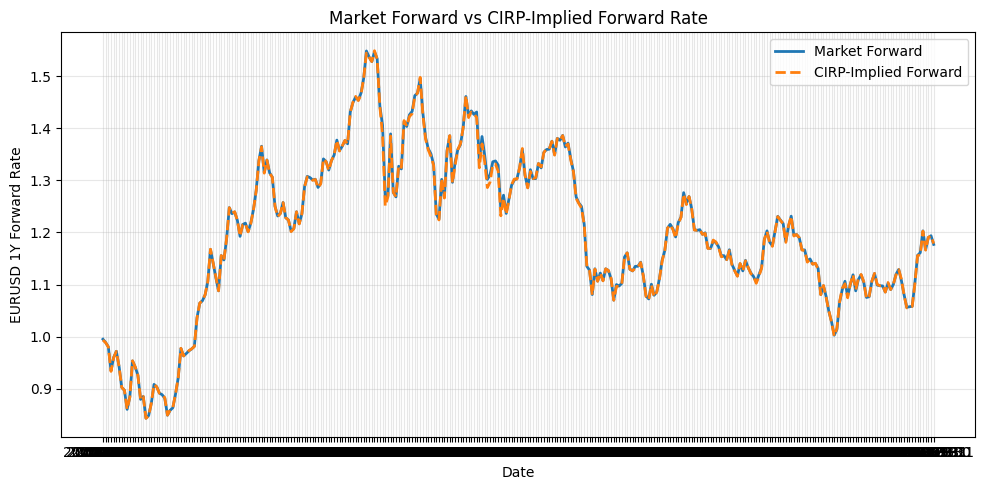

In [24]:
# Calculate CIRP-implied forward rate
fx['CIRP_Fwd'] = fx['EUR'] * (1 + fx['USD1YD']/100) / (1 + fx['EUR1YD']/100)

# Market forward rate (spot + forward points)
fx['Market_Fwd'] = fx['EUR'] + fx['EUR1Y'] / 10_000

# Plot
plt.figure(figsize=(10, 5))
plt.plot(fx['Date'], fx['Market_Fwd'], label='Market Forward', linewidth=2)
plt.plot(fx['Date'], fx['CIRP_Fwd'], label='CIRP-Implied Forward', linewidth=2, linestyle='--')
plt.xlabel('Date')
plt.ylabel('EURUSD 1Y Forward Rate')
plt.title('Market Forward vs CIRP-Implied Forward Rate')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


c) Calculate and plot 1-year EURUSD basis. In which calendar years in the sample period
is the average yearly basis significantly different from zero at the 95% confidence level?

**Basis Definition:**

$$\text{Basis (bps)} = \left(\frac{F_{market}}{F_{CIRP}} - 1\right) \times 10,000$$


Yearly Basis Analysis:
2000: Mean =    4.69 bps, t-stat =   2.60, p-value = 0.0249 **
2001: Mean =    1.07 bps, t-stat =   0.71, p-value = 0.4930 
2002: Mean =   -2.28 bps, t-stat =  -3.21, p-value = 0.0083 ***
2003: Mean =   -2.20 bps, t-stat =  -2.14, p-value = 0.0554 *
2004: Mean =    1.78 bps, t-stat =   1.61, p-value = 0.1360 
2005: Mean =    4.16 bps, t-stat =   3.47, p-value = 0.0052 ***
2006: Mean =    3.44 bps, t-stat =   4.83, p-value = 0.0005 ***
2007: Mean =    0.57 bps, t-stat =   0.40, p-value = 0.6971 
2008: Mean =   31.30 bps, t-stat =   1.97, p-value = 0.0750 *
2009: Mean =    1.24 bps, t-stat =   0.24, p-value = 0.8134 
2010: Mean =   16.50 bps, t-stat =   3.62, p-value = 0.0040 ***
2011: Mean =   42.49 bps, t-stat =   2.80, p-value = 0.0173 **
2012: Mean =   35.05 bps, t-stat =   2.84, p-value = 0.0160 **
2013: Mean =   -1.51 bps, t-stat =  -0.46, p-value = 0.6547 
2014: Mean =    9.24 bps, t-stat =   3.31, p-value = 0.0069 ***
2015: Mean =    4.66 bps, t-stat =   1.

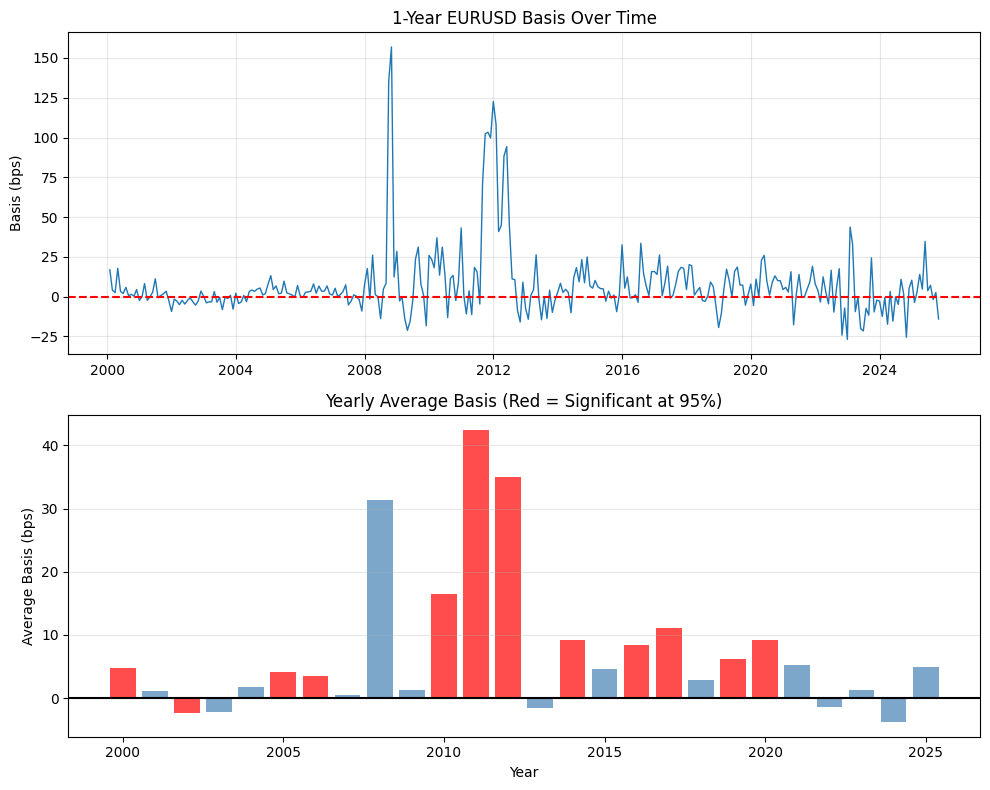

In [25]:
# Ensure 'Date' column is in datetime format
fx['Date'] = pd.to_datetime(fx['Date'])

# Calculate basis (already have Market_Fwd and CIRP_Fwd from part b)
fx['Basis_bps'] = (fx['Market_Fwd'] / fx['CIRP_Fwd'] - 1) * 10_000
fx['Year'] = fx['Date'].dt.year

# Yearly statistics and t-tests
yearly = fx.groupby('Year')['Basis_bps'].agg(['mean', 'std', 'count']).reset_index()
yearly['t_stat'] = yearly['mean'] / (yearly['std'] / np.sqrt(yearly['count']))
yearly['p_value'] = 2 * (1 - stats.t.cdf(np.abs(yearly['t_stat']), yearly['count'] - 1))

# Add significance stars
def add_stars(p_val):
    if p_val < 0.01:
        return '***'
    elif p_val < 0.05:
        return '**'
    elif p_val < 0.10:
        return '*'
    else:
        return ''

yearly['Sig'] = yearly['p_value'].apply(add_stars)

# Display all years with significance markers
print("Yearly Basis Analysis:")
print("=" * 70)
for _, row in yearly.iterrows():
    print(f"{int(row['Year'])}: Mean = {row['mean']:7.2f} bps, "
          f"t-stat = {row['t_stat']:6.2f}, p-value = {row['p_value']:.4f} {row['Sig']}")
print("=" * 70)
print("Significance: *** p<0.01, ** p<0.05, * p<0.10")

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Time series
ax1.plot(fx['Date'], fx['Basis_bps'], linewidth=1)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_ylabel('Basis (bps)')
ax1.set_title('1-Year EURUSD Basis Over Time')
ax1.grid(alpha=0.3)

# Yearly averages
colors = ['red' if p < 0.05 else 'steelblue' for p in yearly['p_value']]
ax2.bar(yearly['Year'], yearly['mean'], color=colors, alpha=0.7)
ax2.axhline(0, color='black')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Basis (bps)')
ax2.set_title('Yearly Average Basis (Red = Significant at 95%)')
ax2.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()




**Interpretation:** Red bars indicate years where the basis is significantly different from zero, suggesting CIRP violations due to market frictions, credit risk, or regulatory constraints.


### Appendix: Solving other parts for verification


**Q1**

In [26]:
#a

print(bonds.head(10))

# Yield calculation function
def get_yields(year):
    df = bonds[bonds['RefDate'].dt.year == year].sort_values('Years')
    yields = []
    
    for idx, row in df.iterrows():
        mat = row['Years']
        price = row['Mid Price']
        coupon = row['Coupon']
        
        # For zero-coupon or 1-year bonds
        if coupon == 0 or mat == 1:
            y = ((100 + coupon)/price)**(1/mat) - 1
        else:
            # Bootstrap: subtract PV of intermediate coupons
            pv_coupons = sum([coupon / (1 + yields[t-1])**t for t in range(1, mat)])
            # Remaining value = final payment discounted
            remaining = price - pv_coupons
            y = ((100 + coupon) / remaining)**(1/mat) - 1
        
        yields.append(y)
    
    return [y * 100 for y in yields]

# Plot
plt.figure(figsize=(10, 6))
for year in [2010, 2015, 2020, 2025]:
    y = get_yields(year)
    print(f"{year}: {[f'{yi:.2f}' for yi in y]}")
    plt.plot(range(1, 11), y, marker='o', label=str(year), linewidth=2)

plt.xlabel('Maturity (Years)')
plt.ylabel('Zero-Coupon Yield (%)')
plt.title('Zero-Coupon Yield Curves')
plt.legend()
plt.grid(alpha=0.3)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()



     RefDate Type     ISIN Code            Description   Maturity  Mid Price
0  15-Jul-25  DSL  NL0011819040  NETHER 0.500 15/07/26  7/15/2026     98.666
1  15-Jul-25  DSL  NL0012171458  NETHER 0.750 15/07/27  7/15/2027     97.761
2  15-Jul-25  DSL  NL0012818504  NETHER 0.750 15/07/28  7/15/2028     96.277
3  15-Jul-25  DSL  NL0013332430  NETHER 0.250 15/07/29  7/15/2029     92.607
4  15-Jul-25  DSL  NL0014555419      NETHER 0 15/07/30  7/15/2030     89.067
5  15-Jul-25  DSL  NL00150006U0      NETHER 0 15/07/31  7/15/2031     86.419
6  15-Jul-25  DSL  NL0015000RP1  NETHER 0.500 15/07/32  7/15/2032     86.826
7  15-Jul-25  DSL  NL0015001AM2  NETHER 2.500 15/07/33  7/15/2033     98.732
8  15-Jul-25  DSL  NL0015001XZ6  NETHER 2.500 15/07/34  7/15/2034     97.831
9  15-Jul-25  DSL  NL0015002F72  NETHER 2.500 15/07/35  7/15/2035     96.911


AttributeError: Can only use .dt accessor with datetimelike values

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Q1b: Forward rate calculation
# Get 2025 yields (already calculated)
yields_2025 = get_yields(2025)
y10 = yields_2025[9] / 100  # 10-year yield
y5 = yields_2025[4] / 100   # 5-year yield

# Calculate 5y5y forward rate
# (1 + y10)^10 = (1 + y5)^5 * (1 + f5y5y)^5
forward_5y5y = ((1 + y10)**10 / (1 + y5)**5)**(1/5) - 1

# Future value in 2035
investment = 200_000
future_value = investment * (1 + forward_5y5y)**5

print(f"Q1b Results:")
print(f"5-year yield (2025): {y5*100:.2f}%")
print(f"10-year yield (2025): {y10*100:.2f}%")
print(f"5y5y forward rate: {forward_5y5y*100:.4f}%")
print(f"Future value on July 15, 2035: €{future_value:,.2f}")


Q1b Results:
5-year yield (2025): 2.34%
10-year yield (2025): 2.91%
5y5y forward rate: 3.4745%
Future value on July 15, 2035: €237,244.52


In [ ]:
# Q1c: Compare two strategies
# Strategy 1: Roll spot 1-year bonds (buy each July, hold 1 year)
# Strategy 2: Buy 1-year forward bonds (lock in rates in advance)

# Get all 1-year yields from 2011-2025
years_strategy = range(2011, 2026)
spot_1y_yields = []
forward_1y_yields = []

for year in years_strategy:
    # Spot 1-year yield
    y = get_yields(year)[0] / 100
    spot_1y_yields.append(y)
    
    # Forward 1-year yield (from previous year's 2-year yield)
    if year > 2011:
        yields_prev = get_yields(year - 1)
        y1_prev = yields_prev[0] / 100
        y2_prev = yields_prev[1] / 100
        # f(1,1) = (1+y2)^2 / (1+y1) - 1
        forward_1y = (1 + y2_prev)**2 / (1 + y1_prev) - 1
        forward_1y_yields.append(forward_1y)

# Strategy 1: Roll spot
value1 = 100_000
for y in spot_1y_yields:
    value1 *= (1 + y)

# Strategy 2: Buy forward (start 2010, get bonds 2011)
value2 = 100_000
for y in forward_1y_yields:
    value2 *= (1 + y)

print(f"Q1c Results:")
print(f"Strategy 1 (roll spot): €{value1:,.2f}")
print(f"Strategy 2 (buy forward): €{value2:,.2f}")
print(f"Difference: €{value1 - value2:,.2f}")
print(f"\nThe difference represents the term premium earned by holding bonds")
print(f"rather than locking in forward rates.")


Q1c Results:
Strategy 1 (roll spot): €106,250.57
Strategy 2 (buy forward): €103,547.44
Difference: €2,703.13

The difference represents the term premium earned by holding bonds
rather than locking in forward rates.


The term premium = €2,703.13.
This positive difference tells you that:
- Holding bonds and rolling them over outperformed locking in forward rates.
- The market underestimated future short-term rates (forward rates were too low).
- Investors earned a term premium for bearing interest rate risk.

**Q2**

In [ ]:
# Load data
prices = pd.read_csv('01_Data/02_prices.csv')
print(prices.head())
# Q2a: Taylor rule estimation
# i_t = i* + a*(inflation_t-1 - π*) + b*gap_t-1

# Get 1-year yields from Q1 (2010-2025)
years = range(2010, 2026)
policy_rates = []
for year in years:
    y1 = get_yields(year)[0]
    policy_rates.append(y1)

# Match with inflation and gap (lagged by 1 year)
taylor_data = []
for i, year in enumerate(years):
    if year > 2010:  # Skip first year (no lag data)
        prev_year = year - 1
        inflation = prices[prices['Year'] == prev_year]['hicpct'].values[0]
        gap = prices[prices['Year'] == prev_year]['gap'].values[0]
        policy_rate = policy_rates[i]
        taylor_data.append([year, policy_rate, inflation, gap])

df_taylor = pd.DataFrame(taylor_data, columns=['Year', 'i_t', 'inflation', 'gap'])

# i* = 10-year yield in 2025
i_star = get_yields(2025)[9]

# Taylor rule: i_t = i* + a*(inflation - π*) + b*gap
# Rearrange: i_t - i* = a*inflation - a*π* + b*gap
# Estimate: (i_t - i*) = c + a*inflation + b*gap, where c = -a*π*

from sklearn.linear_model import LinearRegression

X = df_taylor[['inflation', 'gap']].values
y = (df_taylor['i_t'] - i_star).values

model = LinearRegression()
model.fit(X, y)

a, b = model.coef_
c = model.intercept_

# π* = -c/a
pi_star = -c / a

print(f"Q2a Results:")
print(f"i* (10-year yield 2025): {i_star:.2f}%")
print(f"Taylor rule coefficients:")
print(f"  a (inflation): {a:.4f}")
print(f"  b (output gap): {b:.4f}")
print(f"  c (constant): {c:.4f}")
print(f"π* (equilibrium inflation): {pi_star:.2f}%")


   Year  hicpct  gap
0  2009     0.7 -2.6
1  2010     0.8 -2.0
2  2011     2.3 -1.0
3  2012     2.4 -2.5
4  2013     1.2 -3.0
Q2a Results:
i* (10-year yield 2025): 2.91%
Taylor rule coefficients:
  a (inflation): 0.2995
  b (output gap): -0.0011
  c (constant): -3.1672
π* (equilibrium inflation): 10.57%


In [ ]:
# Q2b: Price of inflation-indexed bond
# 10-year bond with 2.5% coupon issued July 15, 2025
# Use π* as breakeven inflation

coupon = 2.5
pi_star_decimal = pi_star / 100  # Convert to decimal
maturity = 10

# Get zero-coupon yields for 2025
yields_2025 = [y/100 for y in get_yields(2025)]

# Real cash flows (adjusted for inflation)
# Nominal coupon = 2.5, but real yield adjusts for breakeven inflation
# Price = sum of discounted real cash flows using nominal yields

# For inflation-indexed bond:
# Cash flows grow with inflation (π*)
# Discount at nominal yields

price = 0
for t in range(1, maturity + 1):
    # Coupon grows with inflation compounded
    real_coupon = coupon * (1 + pi_star_decimal)**t
    # Discount at nominal zero-coupon yield
    pv = real_coupon / (1 + yields_2025[t-1])**t
    price += pv

# Principal also grows with inflation
principal_inflated = 100 * (1 + pi_star_decimal)**maturity
pv_principal = principal_inflated / (1 + yields_2025[maturity-1])**maturity
price += pv_principal

print(f"\nQ2b Results:")
print(f"π* (breakeven inflation): {pi_star:.2f}%")
print(f"10-year inflation-indexed bond price: {price:.2f}")



Q2b Results:
π* (breakeven inflation): 10.57%
10-year inflation-indexed bond price: 243.71


**Q4**

  Name of Bank  Basis                  Area Main item Sub item Period   \
0    ABN AMRO   IFRS   Balance sheet items    Assets    Total   2014H2   
1    ABN AMRO   IFRS   Balance sheet items    Assets    Total   2015H1   
2    ABN AMRO   IFRS   Balance sheet items    Assets    Total   2015H2   
3    ABN AMRO   IFRS   Balance sheet items    Assets    Total   2016H1   
4    ABN AMRO   IFRS   Balance sheet items    Assets    Total   2016H2   

     waarde  
0  384357.0  
1  408132.0  
2  387728.0  
3  416025.0  
4  391196.0  
           Name of Bank  Basis            Area  \
12682  Yapi Kredi Bank   IFRS   Concentration    
12683  Yapi Kredi Bank   IFRS   Concentration    
12684  Yapi Kredi Bank   IFRS   Concentration    
12685  Yapi Kredi Bank   IFRS   Concentration    
12686  Yapi Kredi Bank   IFRS   Concentration    

                               Main item           Sub item Period   waarde  
12682  Cumulative share of total assets   Percentage share   2022H2    93.6  
12683  Cumulat

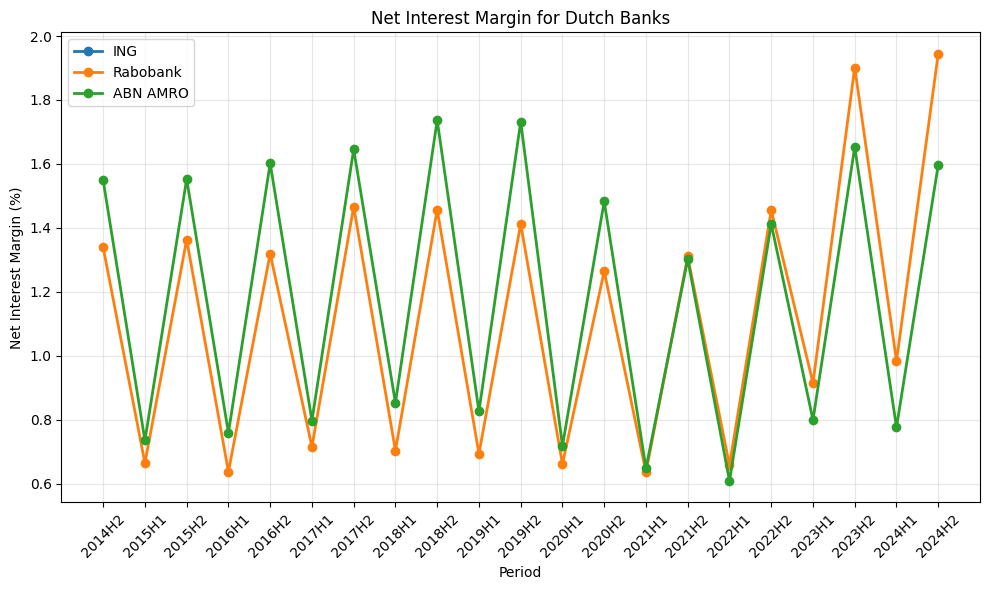

Q4a: NIM plot completed


In [ ]:
# Load bank data
banks = pd.read_csv('01_Data/04_banks.csv')
print(banks.head())
print(banks.tail())
